In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

In [2]:
links = pd.read_csv('email-links-all.csv')

In [3]:
links.shape

(614586, 3)

In [4]:
links = links[links.Date > '1980-01-01 00:00:00'][links.Date < '2043-12-28 19:34:12']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [5]:
links.head()

,Date,From,To
0,2001-05-14 23:39:00,phillip.allen@enron.com,tim.belden@enron.com
1,2001-05-04 20:51:00,phillip.allen@enron.com,john.lavorato@enron.com
2,2000-10-18 10:00:00,phillip.allen@enron.com,leah.arsdall@enron.com
3,2000-10-23 13:13:00,phillip.allen@enron.com,randall.gay@enron.com
4,2000-08-31 12:07:00,phillip.allen@enron.com,greg.piper@enron.com


Count the number of contact events between emails. Here, we consider the number of interactions as weights.

In [6]:
weight_counts = links.groupby(['From', 'To']).size().reset_index(name = 'Count')
weight_counts.to_csv('weighted_links.csv', index=False)

In [7]:
weight_counts.shape

(83714, 3)

In [8]:
weight_counts.sort_values('Count').head()

,From,To,Count
0,101qi@msn.com,enlvwvz@msn.com,1
39614,karen.white@csfb.com,klay@enron.com,1
39615,karen@mpenner.com,jarnold@enron.com,1
39616,karen@mpenner.com,kenneth.lay@enron.com,1
39625,kari.oquinn@enron.com,amy.fitzpatrick@enron.com,1


In [9]:
thresholded_weight_counts = weight_counts.loc[weight_counts['Count'] > 10]

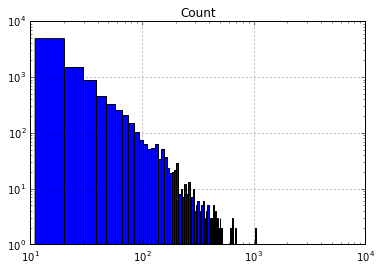

In [10]:
fig, ax = plt.subplots()
thresholded_weight_counts.hist(ax=ax, column='Count', bins=1000)
ax.set_xscale('log')
ax.set_yscale('log')

Count From messages per email

In [11]:
from_counts = links.groupby(['From']).size().reset_index(name = 'CountFrom')
from_counts.sort_values('CountFrom').shape

(12661, 2)

Get timestamps for each From email

In [12]:
from_spikes = links.groupby('From')['Date'].apply(list)
from_spikes.size

12661

Threshold. Discard emails that are note active

In [13]:
from_spikes = from_spikes[from_spikes.str.len() > 3]
from_spikes.size

6601

In [14]:
timestamps = list(set(links.Date.tolist()))
timestamps = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in timestamps]
len(timestamps)

166316

In [15]:
timestamps.sort()

In [16]:
start_time = min(timestamps)
end_time = max(timestamps)

In [17]:
from_spikes[:10]

From
1800flowers@shop2u.com             [2000-11-21 01:21:00, 2000-11-21 01:21:00, 200...
2000greetings@postalmanager.com    [2002-01-08 18:25:48, 2002-01-22 17:53:03, 200...
2740741@skytel.com                 [2000-09-06 15:34:00, 2000-09-06 16:33:00, 200...
40ees@enron.com                    [2001-10-05 18:45:16, 2001-10-05 18:45:16, 200...
40enron@enron.com                  [2001-06-06 18:08:58, 2001-05-03 19:48:48, 200...
7409949@skytel.com                 [2001-06-26 17:07:00, 2001-07-18 21:04:00, 200...
7409950@skytel.com                 [2001-11-25 20:17:03, 2001-11-25 20:22:26, 200...
8774754543@skytel.com              [2001-11-17 17:51:21, 2002-01-17 15:34:43, 200...
8777865122@skytel.com              [2002-01-10 19:10:59, 2002-01-10 19:00:10, 200...
9069761@skytel.com                 [2001-07-18 20:20:00, 2000-11-07 13:47:00, 200...
Name: Date, dtype: object

In [41]:
for arr in from_spikes.values[:7]:
    print [int(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').strftime("%s")) for date in arr]

[974766060, 974766060, 974766060, 974765760, 974765760, 974765760]
[1010510748, 1011718383, 1011284385, 1013270957, 1009538283, 1008839561, 1016089519, 1008353738, 1003896556]
[968247240, 968250780, 968321640, 968247240, 968250780, 968321640]
[1002300316, 1002300316, 1002300456, 1002300456, 1002213712, 1002213712, 999024662, 999022802]
[991843738, 988912128, 988912128, 988912128, 991843520, 991650291, 991650291, 991650291, 983897179, 983897179, 983897179, 984780664, 991340955, 991340955, 991340955, 991135622, 991135622, 991654483, 990794084, 984077177, 995399741, 988056832, 992979594, 992979594, 992979594, 994098629, 1000943185, 985032054, 985183733, 986840944, 990553281, 993232458, 999675066, 999675066, 999675066, 999674409, 999674409, 999674409, 999608141, 999608141, 999608141, 999587261, 999587261, 999587261, 997252431, 997252431, 997252431, 994939882, 994939882, 994939882, 997136433, 999524971, 999524971, 999524971, 999499107, 999499107, 998462344, 998462344, 998462344, 998058557, 

In [42]:
from_spikes.values[:7]

array([ list(['2000-11-21 01:21:00', '2000-11-21 01:21:00', '2000-11-21 01:21:00', '2000-11-21 01:16:00', '2000-11-21 01:16:00', '2000-11-21 01:16:00']),
       list(['2002-01-08 18:25:48', '2002-01-22 17:53:03', '2002-01-17 17:19:45', '2002-02-09 17:09:17', '2001-12-28 12:18:03', '2001-12-20 10:12:41', '2002-03-14 08:05:19', '2001-12-14 19:15:38', '2001-10-24 06:09:16']),
       list(['2000-09-06 15:34:00', '2000-09-06 16:33:00', '2000-09-07 12:14:00', '2000-09-06 15:34:00', '2000-09-06 16:33:00', '2000-09-07 12:14:00']),
       list(['2001-10-05 18:45:16', '2001-10-05 18:45:16', '2001-10-05 18:47:36', '2001-10-05 18:47:36', '2001-10-04 18:41:52', '2001-10-04 18:41:52', '2001-08-28 20:51:02', '2001-08-28 20:20:02']),
       list(['2001-06-06 18:08:58', '2001-05-03 19:48:48', '2001-05-03 19:48:48', '2001-05-03 19:48:48', '2001-06-06 18:05:20', '2001-06-04 12:24:51', '2001-06-04 12:24:51', '2001-06-04 12:24:51', '2001-03-06 17:46:19', '2001-03-06 17:46:19', '2001-03-06 17:46:19', '2001-